## 2.2 Text Representation

Imagine a vast library, filled with countless stories, poems, and articles. But how can machines navigate this sea of words and understand their meaning? This is where text representation comes in - it's the process of transforming text into numerical formats that computers can comprehend and analyze.

Today, we'll embark on a journey through three key approaches to text representation:
1. Bag-of-words (BoW)
2. TF-IDF, and
3. Word embeddings.

Each method offers a different perspective on how to capture the essence of text and pave the way for powerful Natural Language Processing (NLP) applications.

### 1. Bag-of-Words: Simplicity at its Core

- BoW is the most straightforward method. Think of it as a word-frequency counter. Each text document is treated as a "bag" of words, where each word is counted and represented as its own feature in a vector.
- This vector essentially tells us how often each word appears in the document, ignoring order and grammatical structure.

![](https://miro.medium.com/v2/resize:fit:661/0*cf1wq8eIix-Z2qIf.png)

Pros:

- Easy to implement and computationally efficient.
- Works well for simple tasks like document classification.

Cons:

- Ignores word order and relationships, leading to loss of information.
- Sensitive to stop words like "the" and "a," which frequently appear but carry little meaning.

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Sample documents
documents = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?"
]

# Step 1: Create a CountVectorizer
vectorizer = CountVectorizer()

# Step 2: Fit and transform the documents into a bag-of-words representation
X_bow = vectorizer.fit_transform(documents)

# Create a DataFrame using the bag-of-words representation and the vocabulary
df = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())

# Display the vocabulary as column names
print("Vocabulary as Column Names:", df.columns.tolist())

# Display the bag-of-words representation in table format
print("-------------------------------------------")
print("Bag-of-Words Representation (Table Format):")
print("-------------------------------------------")
display(df)

# Create a table with the count of each word
word_count = df.sum(axis=0).reset_index()
word_count.columns = ['Word', 'Count']

# Display the table with word counts
print("--------------------------")
print("Table with Word Counts:")
print("--------------------------")
display(word_count)

Vocabulary as Column Names: ['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
-------------------------------------------
Bag-of-Words Representation (Table Format):
-------------------------------------------


,and,document,first,is,one,second,the,third,this
0,0,1,1,1,0,0,1,0,1
1,0,2,0,1,0,1,1,0,1
2,1,0,0,1,1,0,1,1,1
3,0,1,1,1,0,0,1,0,1


--------------------------
Table with Word Counts:
--------------------------


,Word,Count
0,and,1
1,document,4
2,first,2
3,is,4
4,one,1
5,second,1
6,the,4
7,third,1
8,this,4


### 2.TF-IDF

- TF-IDF builds upon BoW by adding a layer of importance. It considers not only how often a word appears in a document (Term Frequency - TF) but also how common it is across the entire corpus (Inverse Document Frequency - IDF). Words that are unique to a document carry more weight, while frequent common words are downplayed.

![](https://www.kdnuggets.com/wp-content/uploads/awan_convert_text_documents_tfidf_matrix_tfidfvectorizer_3.png)

**Pros:**

- Captures the relative importance of words, leading to more nuanced representations.
- Improves performance on tasks like information retrieval and sentiment analysis.

**Cons:**
- More computationally expensive than BoW.
- Relies on the quality of the corpus used for calculating IDF.

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Create a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Step 2: Fit and transform the documents into a TF-IDF representation
X_tfidf = tfidf_vectorizer.fit_transform(documents)

# Display the vocabulary
print("Vocabulary:", tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF representation
print("TF-IDF Representation:")
print(X_tfidf.toarray())

Vocabulary: ['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
TF-IDF Representation:
[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]


Vocabulary as Column Names:
Index(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'],
      dtype='object')
TF-IDF Representation (Table Format):


,and,document,first,is,one,second,the,third,this
0,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085
1,0.000000,0.687624,0.000000,0.281089,0.000000,0.538648,0.281089,0.000000,0.281089
2,0.511849,0.000000,0.000000,0.267104,0.511849,0.000000,0.267104,0.511849,0.267104
3,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085


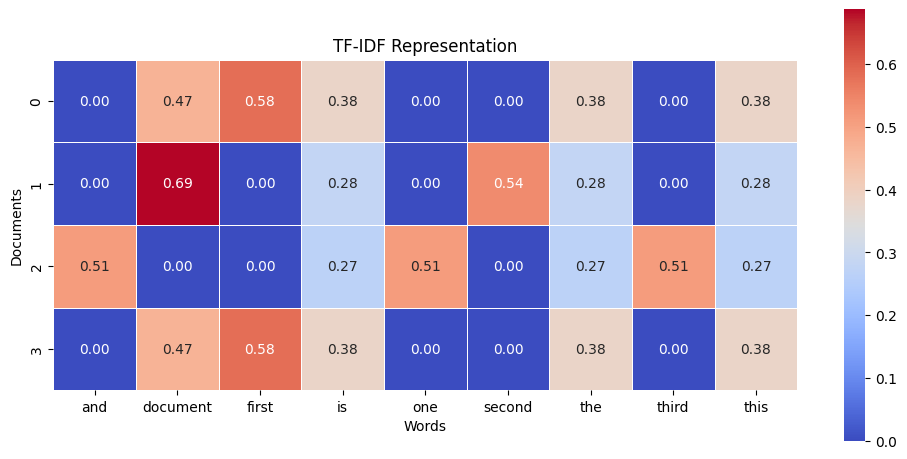

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample documents
documents = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?"
]

# Step 1: Create a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Step 2: Fit and transform the documents into a TF-IDF representation
X_tfidf = tfidf_vectorizer.fit_transform(documents)

# Create a DataFrame using the TF-IDF representation and the vocabulary
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the vocabulary as column names
print("Vocabulary as Column Names:")
print(df_tfidf.columns)

# Display the TF-IDF representation in table format
print("TF-IDF Representation (Table Format):")
display(df_tfidf)

# Display the TF-IDF representation in plot format
plt.figure(figsize=(12, 8))
sns.heatmap(df_tfidf, cmap="coolwarm", annot=True, fmt=".2f", linewidths=.5, square=True, cbar_kws={"shrink": 0.7})
plt.title("TF-IDF Representation")
plt.xlabel("Words")
plt.ylabel("Documents")
plt.show()

### 3.Word Embedding:

Word embeddings take text representation to a whole new level.
- Instead of simply counting words, they aim to capture the semantic relationships between them.
- Imagine words as points in a **high-dimensional space**, where similar words are **positioned closer together**. This allows models to understand **synonyms**, **antonyms**, and **even word analogies**.

**Pros:**

- Captures semantic relationships, leading to richer representations.
- Enables tasks like machine translation and question answering.

**Cons:**

- Requires more complex algorithms and training data.
- Interpretation of the embedding space can be challenging.

Word Embeddings (Table Format):
                 Dimension_1  Dimension_2  Dimension_3  Dimension_4  \
Word               -0.557376    -1.596142     0.531439     0.841055   
embeddings         -0.407580     0.792942     0.336235     0.638531   
provide            -0.631942    -0.607567     0.297531    -0.152091   
dense              -0.394080    -0.614096    -0.700261     0.092315   
vector              0.304769    -0.140982     0.582661    -0.198400   
representations    -0.164141     1.427831    -0.457112    -0.485688   
of                  1.877697    -0.918950    -1.612479    -0.420715   
words              -0.498878     2.258748     0.230180     0.121575   
.                  -0.712302    -0.764175     0.042112    -1.581248   

                 Dimension_5  Dimension_6  Dimension_7  Dimension_8  \
Word               -0.557039    -0.316780     0.256544     0.861630   
embeddings          0.866330    -0.387773     1.981985     0.343399   
provide             0.012327    -0.135128   

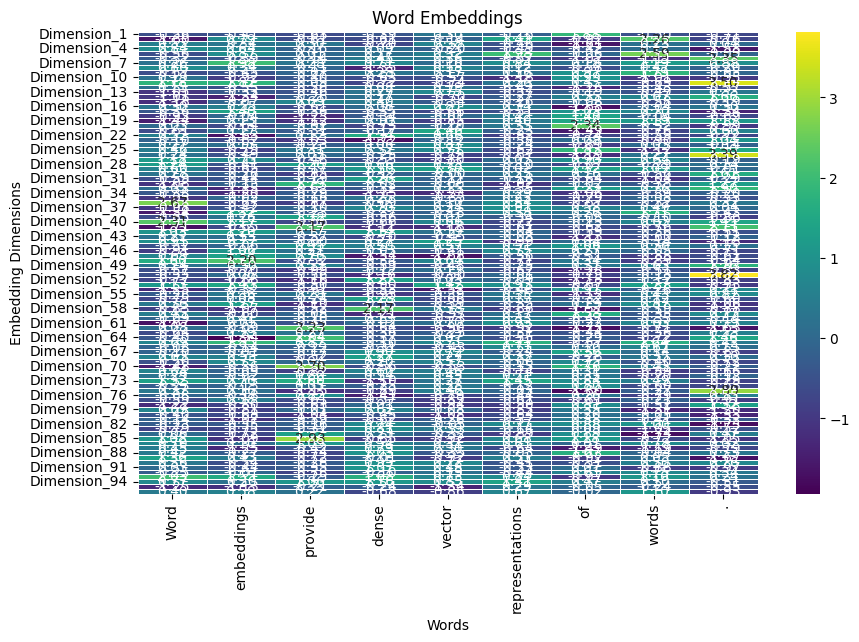

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Sample sentence
sentence = "Word embeddings provide dense vector representations of words."

# Tokenize and get word embeddings
tokens = nlp(sentence)
word_embeddings = [token.vector for token in tokens]

# Create a DataFrame using the word embeddings
df_word_embeddings = pd.DataFrame(word_embeddings, columns=[f"Dimension_{i+1}" for i in range(len(word_embeddings[0]))])

# Set the words as row labels in the table
df_word_embeddings.index = [token.text for token in tokens]

# Display the word embeddings in table format
print("Word Embeddings (Table Format):")
print(df_word_embeddings)

# Display the word embeddings in graph format
plt.figure(figsize=(10, 6))
sns.heatmap(df_word_embeddings.T, cmap="viridis", annot=True, fmt=".2f", linewidths=.5)
plt.title("Word Embeddings")
plt.xlabel("Words")
plt.ylabel("Embedding Dimensions")
plt.show()

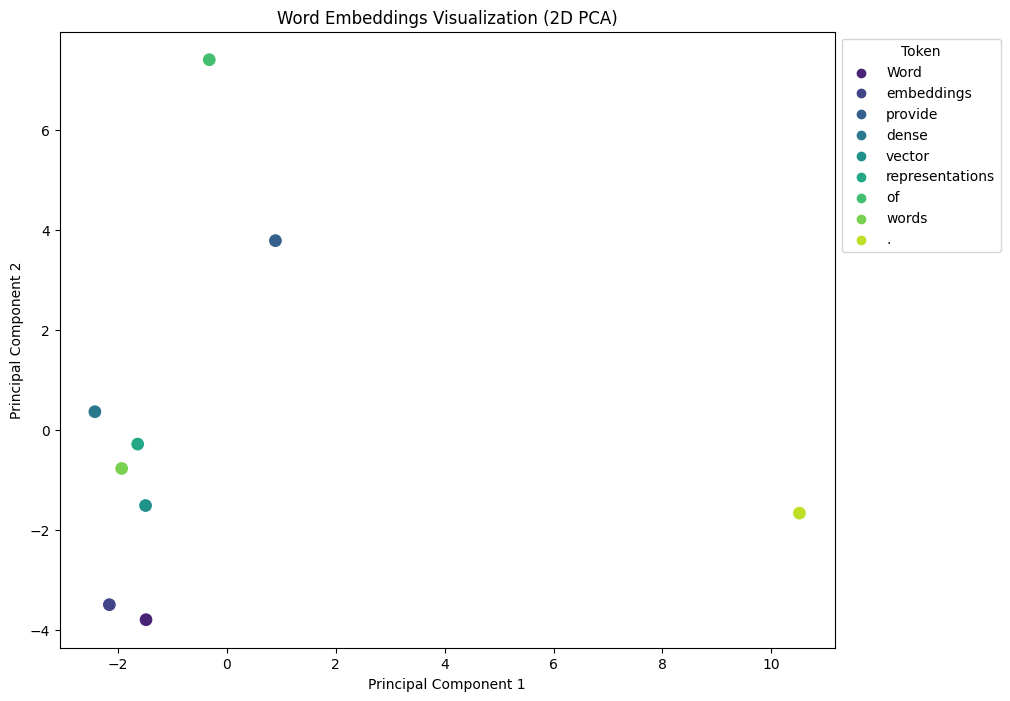

In [21]:
import spacy
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Sample sentence
sentence = "Word embeddings provide dense vector representations of words."

# Tokenize and get word embeddings
tokens = nlp(sentence)
word_embeddings = [token.vector for token in tokens]

# Convert the list of word embeddings to a NumPy array
word_embeddings_array = np.array(word_embeddings)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
word_embeddings_2d = pca.fit_transform(word_embeddings_array)

# Create a DataFrame with word embeddings and token labels
df_word_embeddings = pd.DataFrame(word_embeddings_2d, columns=['PC1', 'PC2'])
df_word_embeddings['Token'] = [token.text for token in tokens]

# Display the word embeddings in an interactive scatter plot using Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_word_embeddings, x='PC1', y='PC2', hue='Token', palette='viridis', s=100)
plt.title('Word Embeddings Visualization (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title='Token')
plt.show()

In [24]:
!python -m spacy download en_core_web_lg

2024-01-05 15:49:33.025308: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-05 15:49:33.025378: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-05 15:49:33.026844: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-05 15:49:34.274657: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


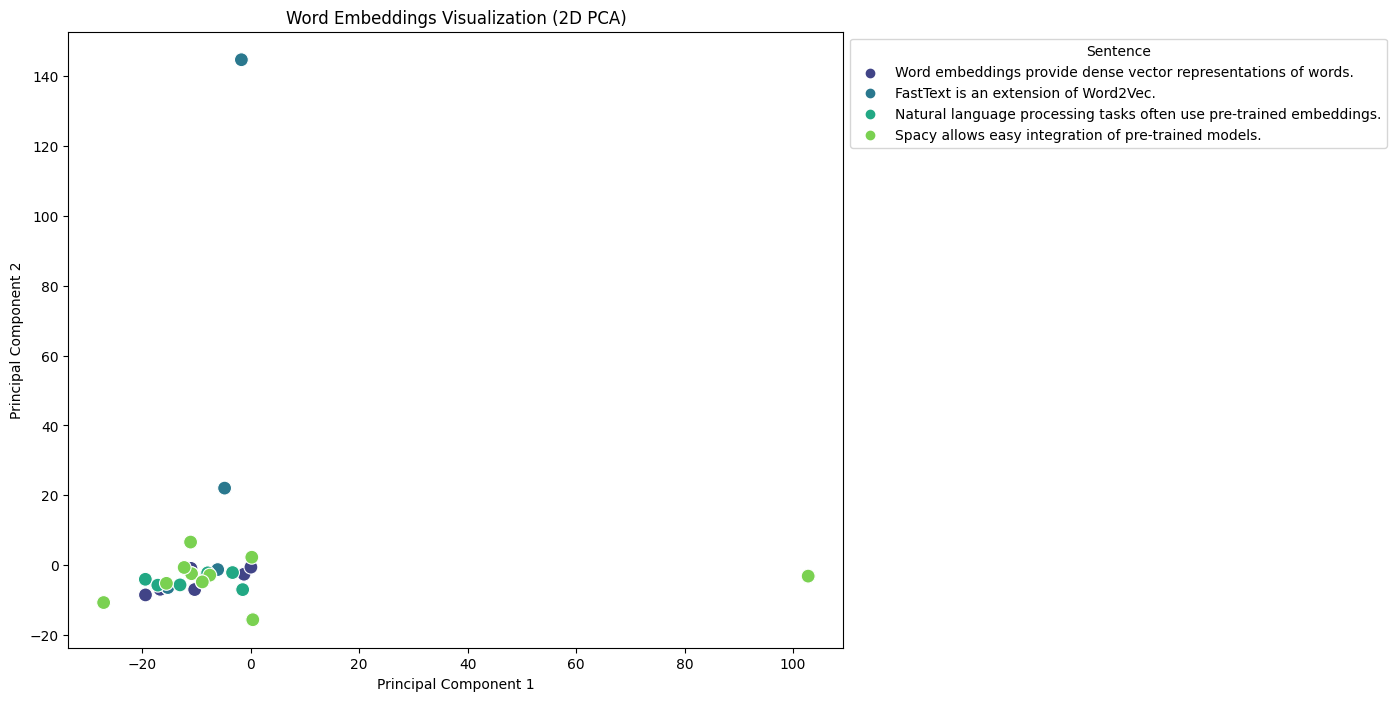

In [25]:
import spacy
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Load spaCy model with Word2Vec embeddings
nlp = spacy.load("en_core_web_lg")

# Sample sentences
sentences = [
    "Word embeddings provide dense vector representations of words.",
    "FastText is an extension of Word2Vec.",
    "Natural language processing tasks often use pre-trained embeddings.",
    "Spacy allows easy integration of pre-trained models.",
]

# Tokenize and get word embeddings
word_embeddings = [token.vector for sent in sentences for token in nlp(sent)]

# Create a DataFrame using the word embeddings
df_word_embeddings = np.array(word_embeddings)
df_word_embeddings = pd.DataFrame(df_word_embeddings, columns=[f"Dimension_{i+1}" for i in range(len(df_word_embeddings[0]))])

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
word_embeddings_2d = pca.fit_transform(df_word_embeddings)

# Create a DataFrame with 2D PCA results and sentences as labels
df_pca = pd.DataFrame(word_embeddings_2d, columns=['PC1', 'PC2'])
df_pca['Sentence'] = [sent for sent in sentences for _ in range(len(nlp(sent)))]

# Display the 2D PCA results in a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Sentence', palette='viridis', s=100)
plt.title('Word Embeddings Visualization (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title='Sentence')
plt.show()

In [ ]:
import numpy as np
import gensim.downloader as api
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Load pre-trained FastText model
fasttext_model = api.load('fasttext-wiki-news-subwords-300')

# Sample sentences
sentences = [
    "Word embeddings provide dense vector representations of words.",
    "FastText is an extension of Word2Vec.",
    "Natural language processing tasks often use pre-trained embeddings.",
    "Spacy allows easy integration of pre-trained models.",
]

# Get word embeddings using the FastText model
word_embeddings = [fasttext_model[word] for sent in sentences for word in sent.split()]

# Create a DataFrame using the word embeddings
df_word_embeddings = np.array(word_embeddings)
df_word_embeddings = pd.DataFrame(df_word_embeddings, columns=[f"Dimension_{i+1}" for i in range(len(df_word_embeddings[0]))])

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
word_embeddings_2d = pca.fit_transform(df_word_embeddings)

# Create a DataFrame with 2D PCA results and sentences as labels
df_pca = pd.DataFrame(word_embeddings_2d, columns=['PC1', 'PC2'])
df_pca['Sentence'] = [sent for sent in sentences for _ in sent.split()]

# Display the 2D PCA results in a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Sentence', palette='viridis', s=100)
plt.title('Word Embeddings Visualization (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title='Sentence')
plt.show()

[======================----------------------------] 44.0% 422.2/958.4MB downloaded

Learning Resources:
1. https://jalammar.github.io/illustrated-word2vec/
2. https://towardsdatascience.com/tf-term-frequency-idf-inverse-document-frequency-from-scratch-in-python-6c2b61b78558
3. https://machinelearningmastery.com/gentle-introduction-bag-words-model/